In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
full_df = pd.merge(ride_data_df, city_data_df, on='city')

# Display the data table for preview
full_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [9]:
# Calculate Type Percents - Fares
total_fares = full_df['fare'].sum()
fares = (full_df.groupby(['type']).sum()).iloc[:,0]
rural_fares = fares[0]
suburban_fares = fares[1]
urban_fares = fares[2]
rural_f_perc = (rural_fares / total_fares) * 100
suburban_f_perc = (suburban_fares / total_fares) * 100
urban_f_perc = (urban_fares / total_fares) * 100

# Calculate Ride Percents
total_rides = len(full_df)
urban_count = len(full_df.loc[full_df["type"] == "Urban", :])
urban_r_perc = (urban_count / total_rides) * 100
suburban_count = len(full_df.loc[full_df["type"] == "Suburban", :])
suburban_r_perc = (suburban_count / total_rides) * 100
rural_count = len(full_df.loc[full_df["type"] == "Rural", :])
rural_r_perc = (rural_count / total_rides) * 100

# Calculate Driver Percents 
total_drives = len((full_df.groupby(['type','driver_count'])).count())
rural_drives = len(full_df[full_df['type'] == 'Rural'].groupby('driver_count').count())
suburban_drivers = len(full_df[full_df['type'] == 'Suburban'].groupby('driver_count').count())
urban_drivers = len(full_df[full_df['type'] == 'Urban'].groupby('driver_count').count())
urban_d_perc = (urban_drivers / total_drives) * 100
suburban_d_perc = (suburban_drivers / total_drives) * 100
rural_d_perc = (rural_drives / total_drives) * 100

#group by city and then find the average fare and number of ridew
city_group_df = full_df.groupby(["type", "city"])
city_fare_df = round(city_group_df.fare.agg(["count","mean"]),0)
city_fare_df.columns = ["Number of Rides", "Average Fare per Ride"]
city_fare_df["% of Total Rides"] = round(city_fare_df["Number of Rides"] / sum(city_fare_df["Number of Rides"]) * 100, 2)
city_fare_df["% of Total Fares"] = round(city_fare_df["Average Fare per Ride"] / sum(city_fare_df["Average Fare per Ride"]) * 100, 2)
city_fare_df.head(5)

#split the data per city type
rural = city_fare_df.loc["Rural" , :]
urban = city_fare_df.loc["Urban" , :]
suburban = city_fare_df.loc["Suburban" , :]


## Bubble Plot of Ride Sharing Data

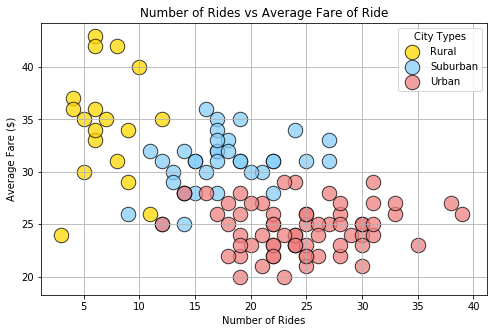

In [5]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

x_axis1 = rural["Number of Rides"]
data1 = rural["Average Fare per Ride"]
x_axis2 = suburban["Number of Rides"]
data2 = suburban["Average Fare per Ride"]
x_axis3 = urban["Number of Rides"]
data3 = urban["Average Fare per Ride"]


plt.figure(figsize=(8,5))
plt.scatter(x_axis1, data1, marker="o", color="gold", edgecolors="black",
            s=total_drives*3, alpha=0.75)

plt.scatter(x_axis2, data2, marker="o", color="lightskyblue", edgecolors="black",
            s=total_drives*3, alpha=0.75)

plt.scatter(x_axis3, data3, marker="o", color="lightcoral", edgecolors="black",
            s=total_drives*3, alpha=0.75)

plt.title("Number of Rides vs Average Fare of Ride")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare ($)")
plt.legend(labels=('Rural','Suburban','Urban'), loc='best', title='City Types')
plt.style.use("seaborn-bright")
plt.grid()
plt.savefig('charts/bubble_plot.png')

In [6]:
# Show plot
#plt.show()

## Total Fares by City Type

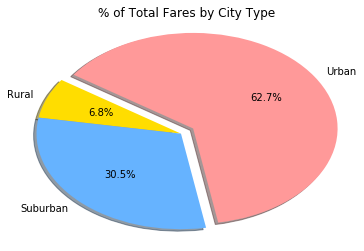

In [7]:
# Build Pie Chart
types = ["Urban", "Rural", "Suburban"]
percentages = [urban_f_perc, rural_f_perc, suburban_f_perc]
colors= ["#ff9999", "#ffdd00", "#66b3ff"]
explode = (0.1, 0, 0)
plt.title("% of Total Fares by City Type")
plt.pie(percentages, explode=explode, labels=types, colors=colors, autopct="%1.1f%%",
        shadow=True, startangle=280)
plt.axis("tight")

# Save Figure
plt.savefig('charts/total_fares_by_city_type.png')

In [130]:
# Show Figure
plt.show()

## Total Rides by City Type

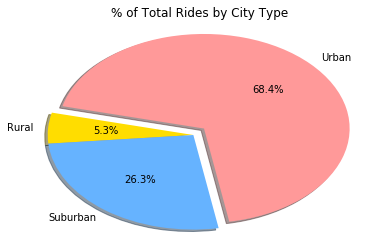

<Figure size 432x288 with 0 Axes>

In [10]:
# Build Pie Chart
percentages = [urban_r_perc, rural_r_perc, suburban_r_perc]
colors= ["#ff9999", "#ffdd00", "#66b3ff"]
explode = (0.1, 0, 0)
plt.title("% of Total Rides by City Type")
plt.pie(percentages, explode=explode, labels=types, colors=colors, autopct="%1.1f%%",
        shadow=True, startangle=280)
plt.axis("tight")
plt.show()

# Save Figure
plt.savefig('charts/total_rides_by_city_type.png')

In [212]:
# Show Figure
plt.show()

## Total Drivers by City Type

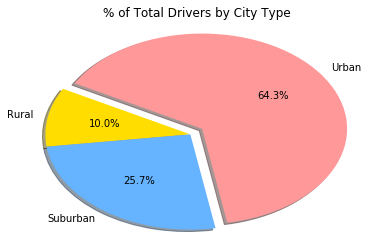

<Figure size 432x288 with 0 Axes>

In [11]:
# Build Pie Chart
percentages = [urban_d_perc, rural_d_perc, suburban_d_perc]
colors= ["#ff9999", "#ffdd00", "#66b3ff"]
explode = (0.1, 0, 0)
plt.title("% of Total Drivers by City Type")
plt.pie(percentages, explode=explode, labels=types, colors=colors, autopct="%1.1f%%",
        shadow=True, startangle=280)
plt.axis("tight")
plt.show()

# Save Figure
plt.savefig('charts/total_drivers_by_city_type.png')

In [190]:
# Show Figure
plt.show()